In [72]:
from dbfread import DBF
import geopandas as gpd
import shapely.ops as sh

In [50]:
river_path = r'C:\Users\bpara\Geo data\ne_10m_rivers_lake_centerlines\ne_10m_rivers_lake_centerlines.shp'

In [51]:
shapefile = gpd.read_file(river_path)

In [81]:
mlrivers = [shapefile["geometry"][588], shapefile["geometry"][234], shapefile["geometry"][233], shapefile["geometry"][1258], shapefile["geometry"][1259], shapefile["geometry"][1293], shapefile["geometry"][205]]
rivers = []
for r in mlrivers:
    for l in r:
        rivers.append(l)
mississippi_basin = sh.linemerge(rivers)

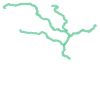

In [82]:
mississippi_basin